In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('CP.csv')
df.head()

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

Y = Y.reshape(-1, 1)


Saving CP.csv to CP (14).csv


In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 6
        outLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_HI2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI1)
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_HI1))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1,self.W_HI2))

        output_input = np.dot(self.hidden_output2, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error * self.sigmoid(pred, der=True)

        hidden_error2 = output_delta.dot(self.W_OH.T)
        hidden2_delta = hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_error2.dot(self.W_HI2.T)
        hidden1_delta = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI1 += X.T.dot(hidden1_delta) * self.learning_rate
        self.W_HI2 += self.hidden_output1.T.dot(hidden2_delta) * self.learning_rate
        self.W_OH += self.hidden_output2.T.dot(output_delta) * self.learning_rate

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

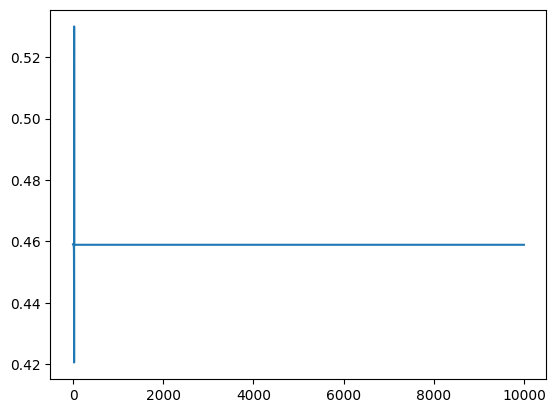

In [ ]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)